In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [ ]:
# Load the dataset
df = pd.read_csv("newds.csv")  # Replace with your file path

# Display the first few rows
print(df.head())

# Check column names
print(df.columns)

  functional group   A  A_OS  A'  A'_OS  A_HOMO-  A_HOMO+   A_IE-   A_IE+  \
0       AgBaAuCdO6  Ag     3  Ba      2     0.59    -3.82  114.05  616.95   
1       AgBaAuHgO6  Ag     3  Ba      2     0.59    -3.82  114.05  616.95   
2       AgBaMoCdO6  Ag     3  Ba      2     0.59    -3.82  114.05  616.95   
3           AgBiO3  Ag     1  Ag      1     0.00    -4.41    0.00  731.00   
4           AgBrO3  Ag     1  Ag      1     0.00    -4.41    0.00  731.00   

   A_LUMO-  ...  B_X+  B_Z_radii-  B_Z_radii+  B_e_affin-  B_e_affin+  \
0     0.65  ...  2.12        0.22        2.44       145.4        77.4   
1     0.65  ...  2.27        0.13        2.54       135.4        87.4   
2     0.65  ...  1.93        0.25        2.47        70.0         2.0   
3     0.00  ...  2.02        0.00        2.00         0.0        91.3   
4     0.00  ...  2.96        0.00        1.20         0.0       324.7   

   PBE band gap     μ    μĀ  μ𝐵 ̅      t  
0          0.00  0.54  0.14  0.14  0.923  
1          0

In [ ]:
# Filter insulators (Eg >= 0.5)
insulator_data = df[df['PBE band gap'] >= 0.5]

# Check the filtered data
print(insulator_data.head())

   functional group   A  A_OS  A'  A'_OS  A_HOMO-  A_HOMO+   A_IE-   A_IE+  \
12       AgCsZrTeO6  Ag     3  Cs      1     1.15    -3.26  177.65  553.35   
32           AgNbO3  Ag     1  Ag      1     0.00    -4.41    0.00  731.00   
36        AgPbWAlO6  Ag     3  Pb      2     0.45    -3.95    7.75  723.25   
49           AgTaO3  Ag     1  Ag      1     0.00    -4.41    0.00  731.00   
65            AsBO3  As     3  As      3     0.00    -5.19    0.00  946.50   

    A_LUMO-  ...  B_X+  B_Z_radii-  B_Z_radii+  B_e_affin-  B_e_affin+  \
12     0.00  ...  1.72        0.58        2.25       74.55      115.65   
32     0.00  ...  1.60        0.00        2.76        0.00       86.20   
36     0.04  ...  1.98        0.53        2.21       17.30       61.30   
49     0.00  ...  1.50        0.00        2.79        0.00       31.00   
65     0.00  ...  2.04        0.00        0.80        0.00       26.70   

    PBE band gap     μ    μĀ  μ𝐵 ̅      t  
12          1.55  0.60  0.23  0.09  0.931 

In [ ]:
X_reg = insulator_data.drop(columns=['PBE band gap'])  # Features
y_reg = insulator_data['PBE band gap']  # Target

In [ ]:
 # Identify non-numeric columns
non_numeric_cols = X_reg.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['functional group', 'A', 'A'', 'Bi', 'B''], dtype='object')


In [ ]:
X_reg = pd.get_dummies(X_reg, columns=non_numeric_cols, drop_first=True)

In [ ]:
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)
X_reg_scaled = pd.DataFrame(X_reg_scaled, columns=X_reg.columns)

In [ ]:
# Split the data (80% training, 20% testing)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Training data shape:", X_train_reg.shape)
print("Testing data shape:", X_test_reg.shape)

Training data shape: (1263, 1791)
Testing data shape: (316, 1791)


In [ ]:
#completed preprocessing here

In [ ]:
#apllying 1st regression model
# Initialize the XGBoost Regressor
xgb_reg = XGBRegressor(random_state=42)

# Train the model
xgb_reg.fit(X_train_reg, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred_xgb = xgb_reg.predict(X_test_reg)

mae_xgb = mean_absolute_error(y_test_reg, y_pred_xgb)
mse_xgb = mean_squared_error(y_test_reg, y_pred_xgb)
r2_xgb = r2_score(y_test_reg, y_pred_xgb)
rmse = mean_squared_error(y_actual, y_pred, squared=False)

# Print the results
print("XGBoost Regressor Performance:")

print(f"MAE: {mae_xgb:.4f}")
print(f"MSE: {mse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")

XGBoost Regressor Performance:
MAE: 0.2213
MSE: 0.1249
R² Score: 0.8206


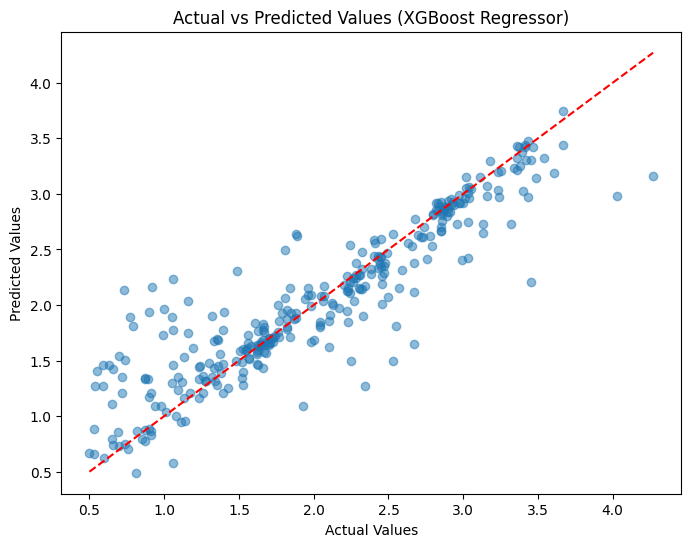

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (XGBoost Regressor)")
plt.show()

<Figure size 1000x600 with 0 Axes>

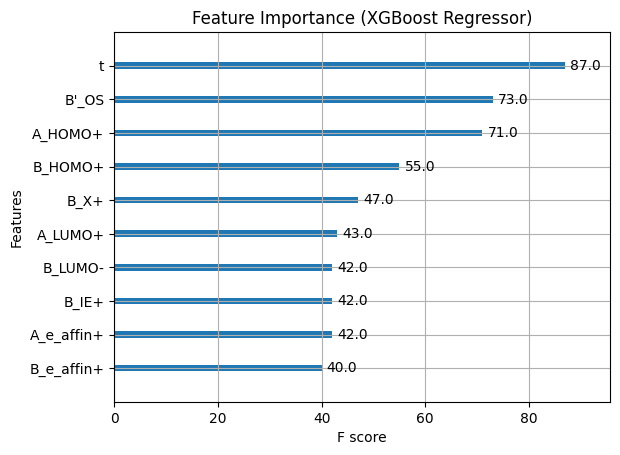

In [ ]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_reg, max_num_features=10)  # Show top 10 features
plt.title("Feature Importance (XGBoost Regressor)")
plt.show()

In [ ]:
# now starting with the second reg model.....Random forest regressor

In [ ]:
# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Train the model
rf_reg.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred_rf = rf_reg.predict(X_test_reg)

# Calculate metrics
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

# Print the results
print("Random Forest Regressor Performance:")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

Random Forest Regressor Performance:
MAE: 0.2268
MSE: 0.1396
R² Score: 0.7996


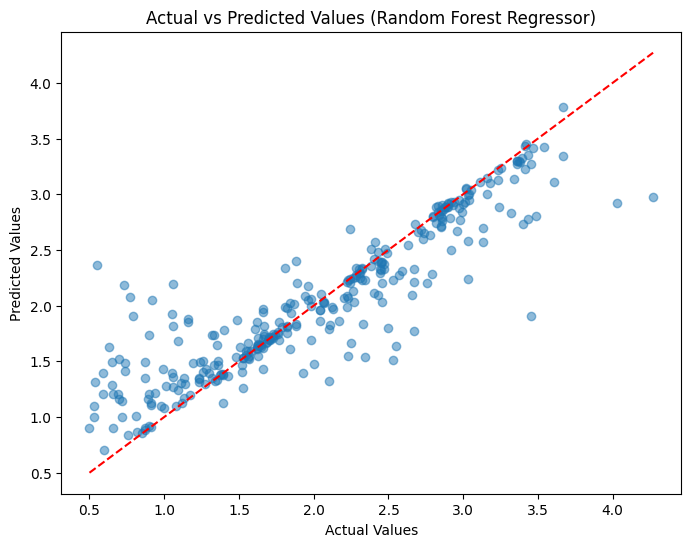

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_rf, alpha=0.5)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest Regressor)")
plt.show()

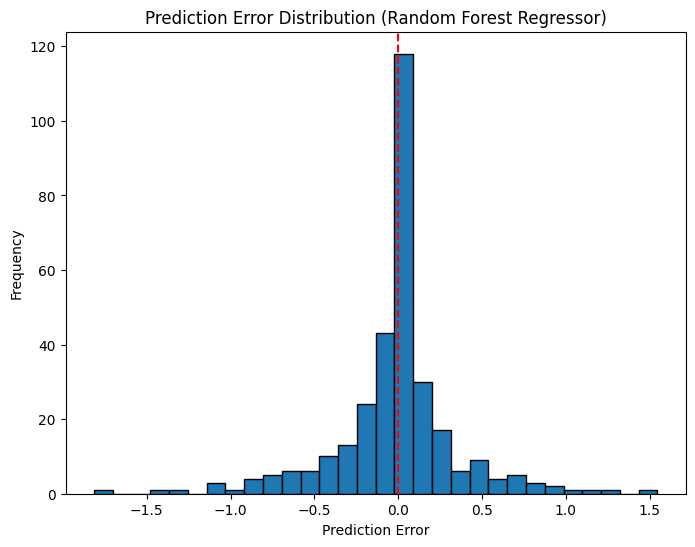

In [ ]:
# Calculate prediction errors
errors = y_test_reg - y_pred_rf

# Plot prediction errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--')  # Vertical line at 0
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Prediction Error Distribution (Random Forest Regressor)")
plt.show()

In [ ]:
# Step 10: Compare the two models
print("Model Comparison:")
print(f"XGBoost - MAE: {mae_xgb:.4f}, MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")
print(f"Random Forest - MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")

Model Comparison:
XGBoost - MAE: 0.2213, MSE: 0.1249, R²: 0.8206
Random Forest - MAE: 0.2268, MSE: 0.1396, R²: 0.7996


In [ ]:
if r2_xgb > r2_rf:
    best_reg_model = xgb_reg
    model_filename = "best_xgboost_regressor.pkl"
else:
    best_reg_model = rf_reg
    model_filename = "best_random_forest_regressor.pkl"

In [ ]:
import joblib
joblib.dump(best_reg_model, model_filename)
print(f"Best model saved to {model_filename}")

Best model saved to best_xgboost_regressor.pkl


In [ ]:
loaded_reg_model = joblib.load(model_filename)
y_pred_best = loaded_reg_model.predict(X_test_reg)
mae_best = mean_absolute_error(y_test_reg, y_pred_best)
mse_best = mean_squared_error(y_test_reg, y_pred_best)
r2_best = r2_score(y_test_reg, y_pred_best)
print("Best Model Performance on Test Data:")
print(f"MAE: {mae_best:.4f}, MSE: {mse_best:.4f}, R²: {r2_best:.4f}")

Best Model Performance on Test Data:
MAE: 0.2213, MSE: 0.1249, R²: 0.8206
